In [398]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

In [399]:
data1 = pd.read_csv("data/geoMap.csv", sep=",")

In [400]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Регионы                           83 non-null     object
 1   кошки: (02.10.2021 – 02.10.2022)  83 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


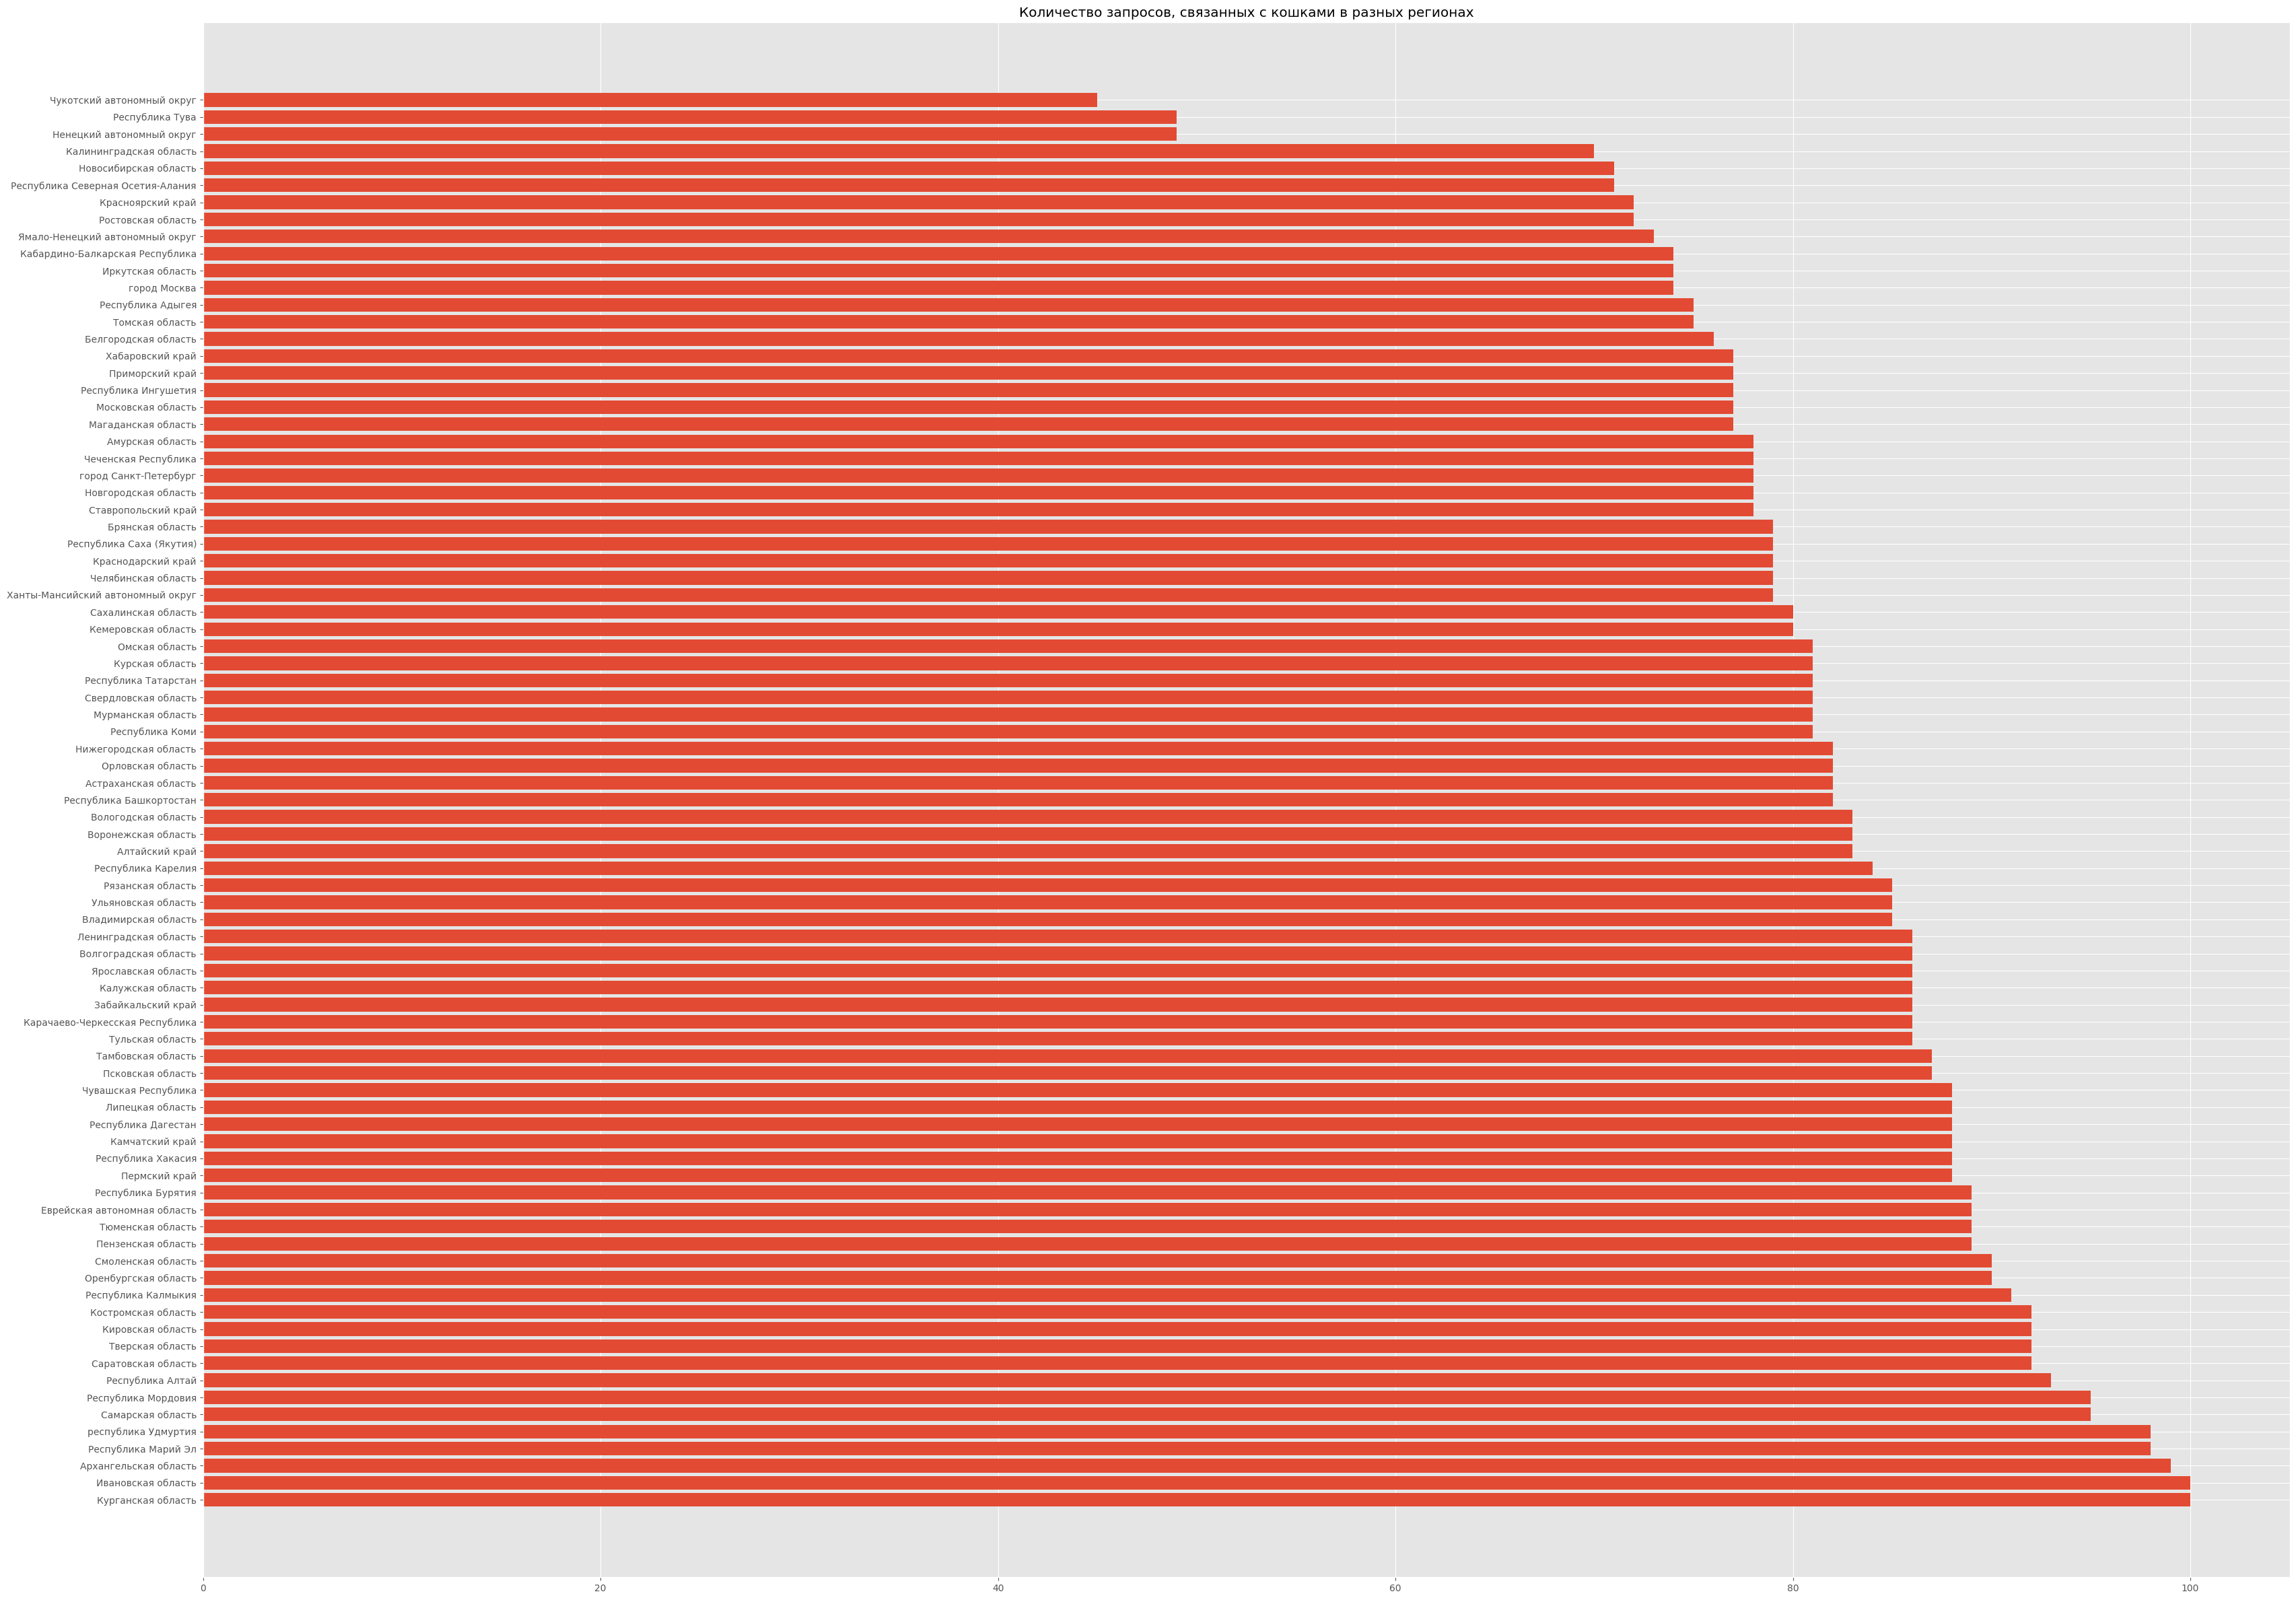

In [401]:
fig, ax = plt.subplots()
ax.barh(data1["Регионы"], data1["кошки: (02.10.2021 – 02.10.2022)"])
ax.set_yticks(data1["Регионы"])
ax.set_yticklabels(data1["Регионы"], fontsize = 10)
ax.set_title("Количество запросов, связанных с кошками в разных регионах")
fig.set_figwidth(40)
fig.set_figheight(30)
plt.savefig('charts/white_version/cats.png')

In [402]:
data2 = pd.read_csv("data/geoMap_1.csv", sep=",")

In [403]:
data2.head()

,Регионы,собаки: (02.10.2021 – 02.10.2022)
0,Ненецкий автономный округ,100
1,Сахалинская область,94
2,Камчатский край,91
3,Чукотский автономный округ,90
4,Псковская область,89


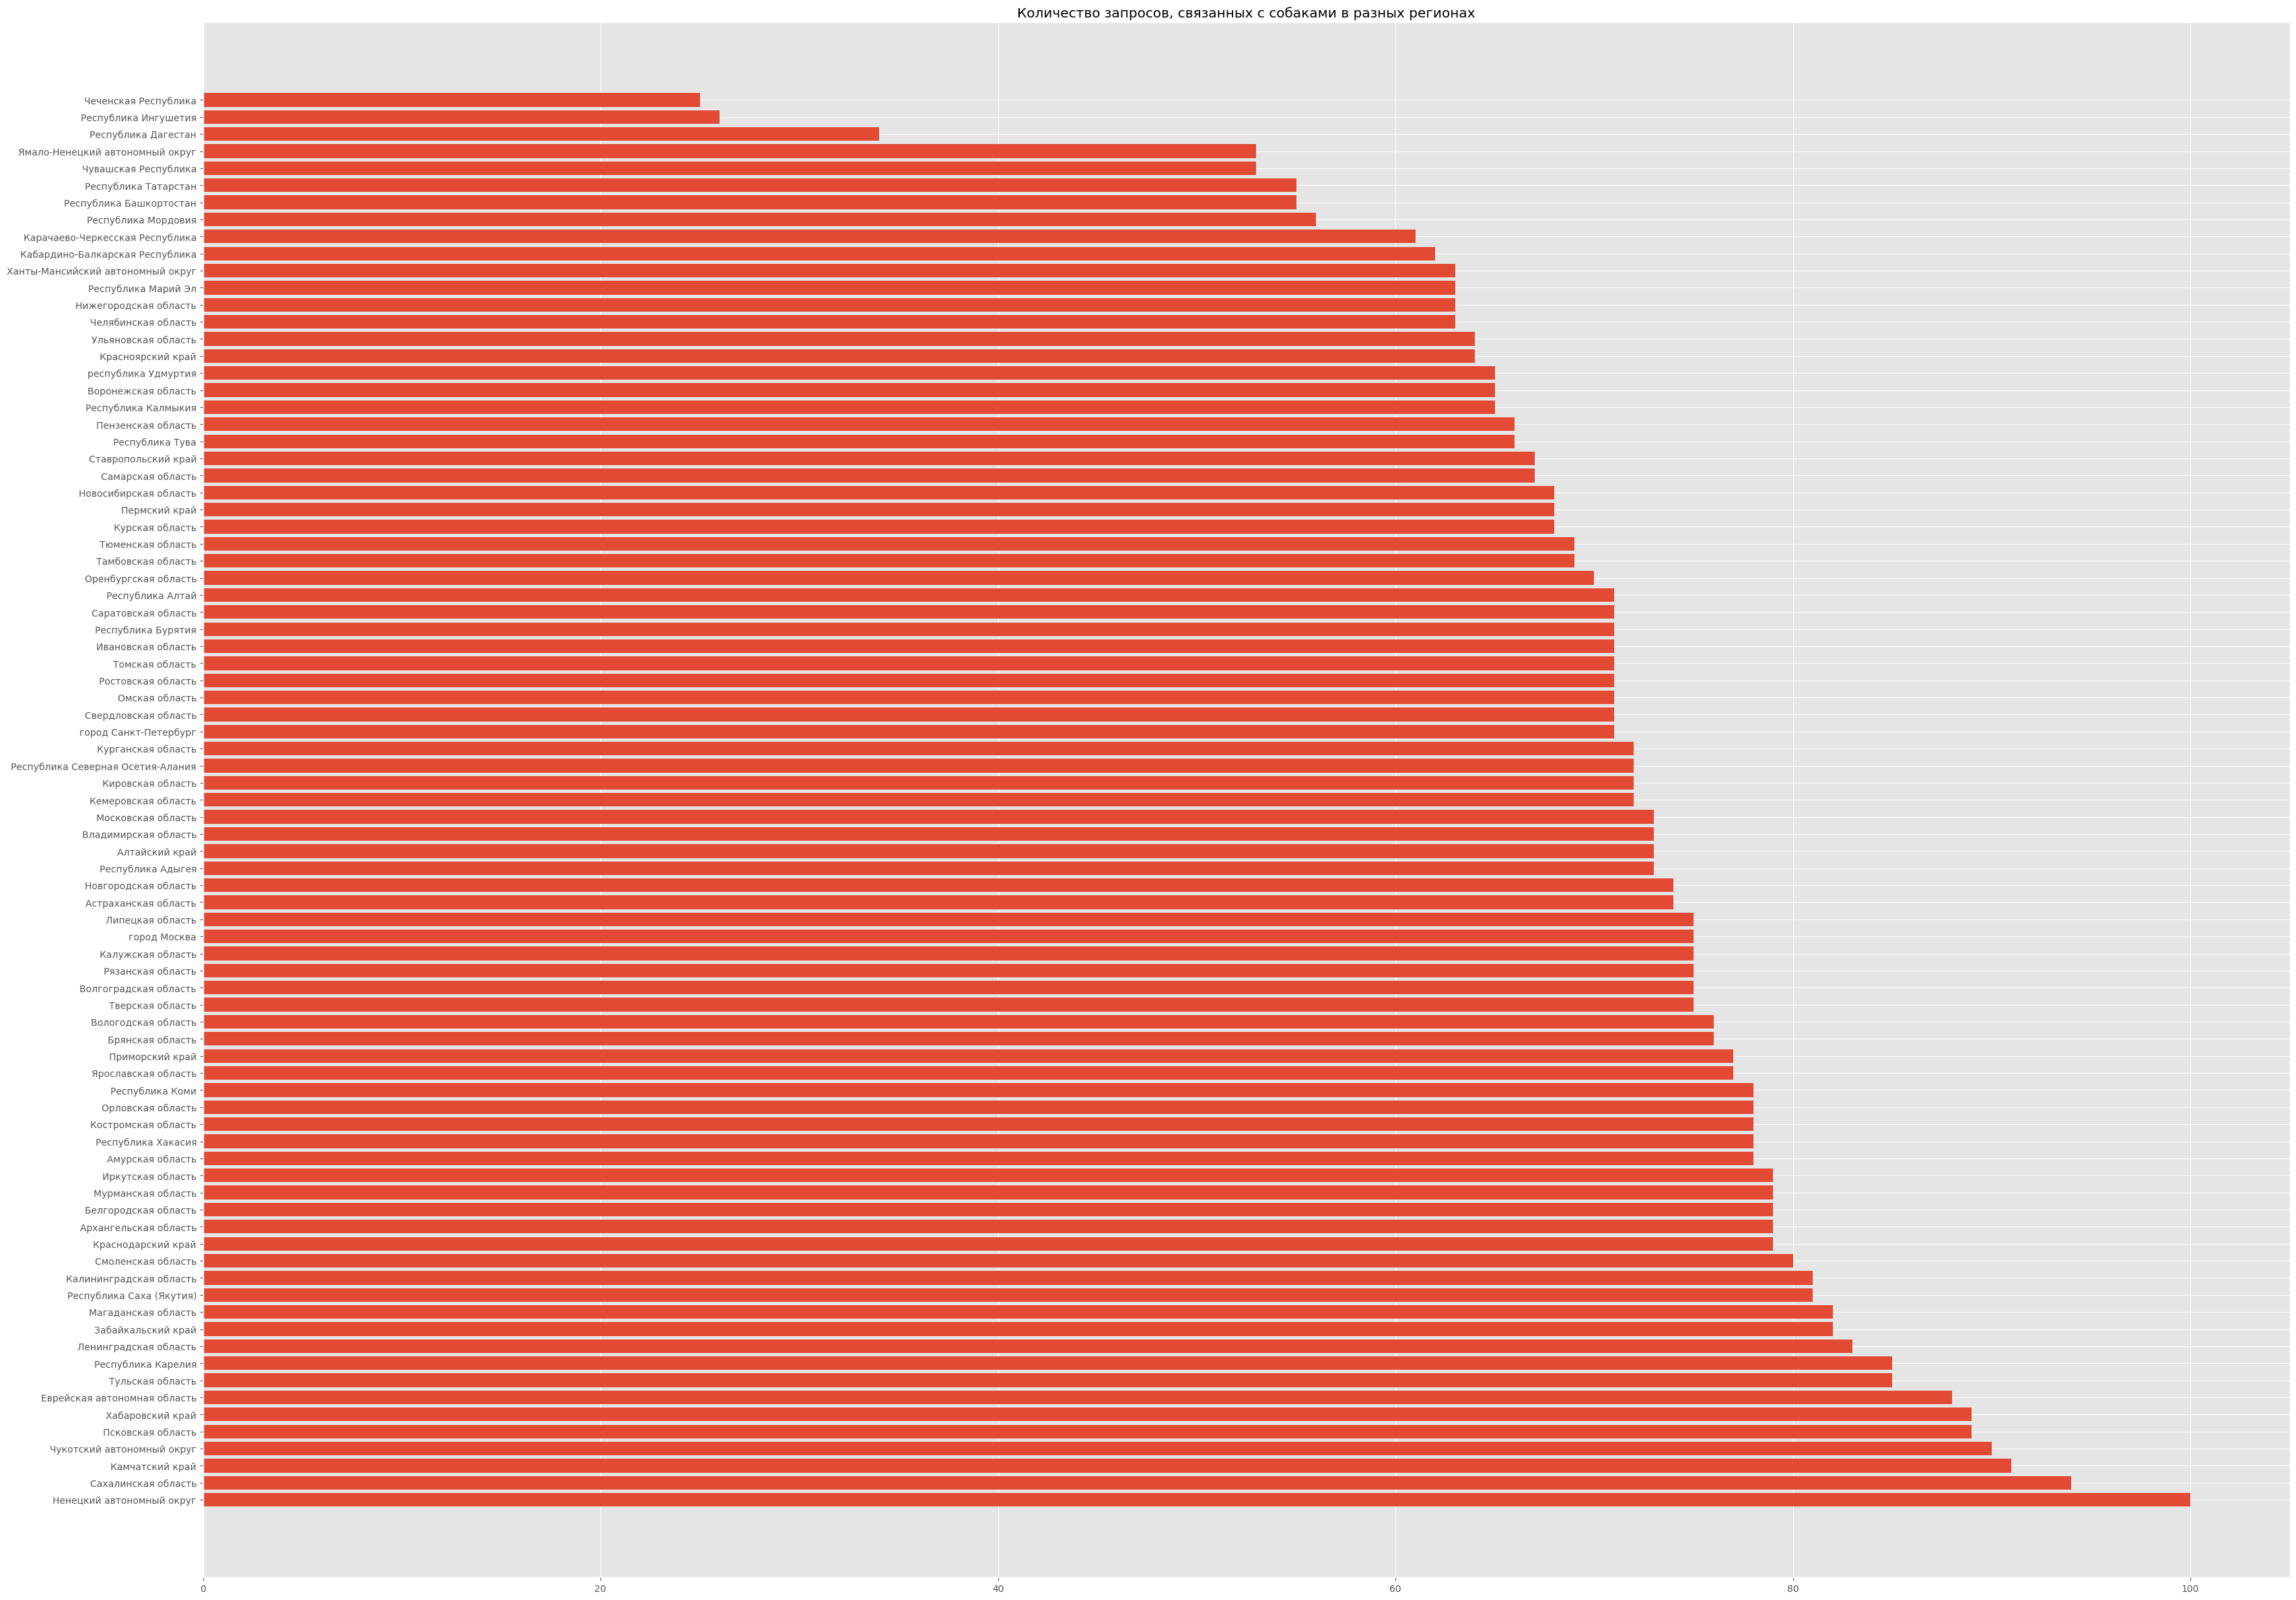

In [404]:
fig, ax = plt.subplots()
ax.barh(data2["Регионы"], data2["собаки: (02.10.2021 – 02.10.2022)"])
ax.set_yticks(data1["Регионы"])
ax.set_yticklabels(data1["Регионы"], fontsize=10)
ax.set_title("Количество запросов, связанных с собаками в разных регионах")
fig.set_figwidth(40)
fig.set_figheight(30)
plt.savefig('charts/white_version/dogs.png')

<AxesSubplot:>

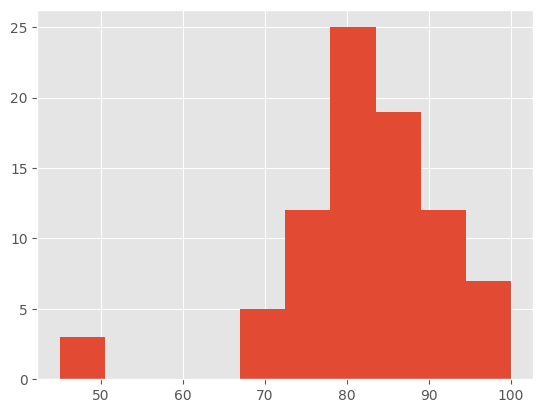

In [405]:
data1["кошки: (02.10.2021 – 02.10.2022)"].hist()

In [406]:
data_cats = pd.read_csv("data/multiTimeline_1.csv")
data_dogs = pd.read_csv("data/multiTimeline_2.csv")

In [407]:
data_cats.head()

,Неделя,собаки
0,2021-10-03,59
1,2021-10-10,56
2,2021-10-17,59
3,2021-10-24,60
4,2021-10-31,70


In [408]:
data_dogs.head()

,Неделя,кошки
0,2021-10-03,78
1,2021-10-10,75
2,2021-10-17,72
3,2021-10-24,79
4,2021-10-31,99


In [409]:
data_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Неделя  52 non-null     object
 1   кошки   52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [410]:
data_dogs["Запрос"] = "Собаки"

In [411]:
data_cats["Запрос"] = "Кошки"

In [426]:
data_dogs = data_dogs.rename(columns={"кошки": "Количество"})
data_cats = data_cats.rename(columns={"собаки": "Количество"})
data_cats = data_cats.rename(columns={"Неделя": "Дата"})
data_dogs = data_dogs.rename(columns={"Неделя": "Дата"})

In [427]:
data_merge = data_dogs.copy()

In [428]:
data_merge = data_merge.merge(data_cats, how="outer")

In [429]:
data_merge

,Дата,Количество,Запрос
0,2021-10-03,78,Собаки
1,2021-10-10,75,Собаки
2,2021-10-17,72,Собаки
3,2021-10-24,79,Собаки
4,2021-10-31,99,Собаки
...,...,...,...
99,2022-08-28,64,Кошки
100,2022-09-04,64,Кошки
101,2022-09-11,60,Кошки
102,2022-09-18,58,Кошки


In [430]:
data_merge.dtypes

Дата          object
Количество     int64
Запрос        object
dtype: object

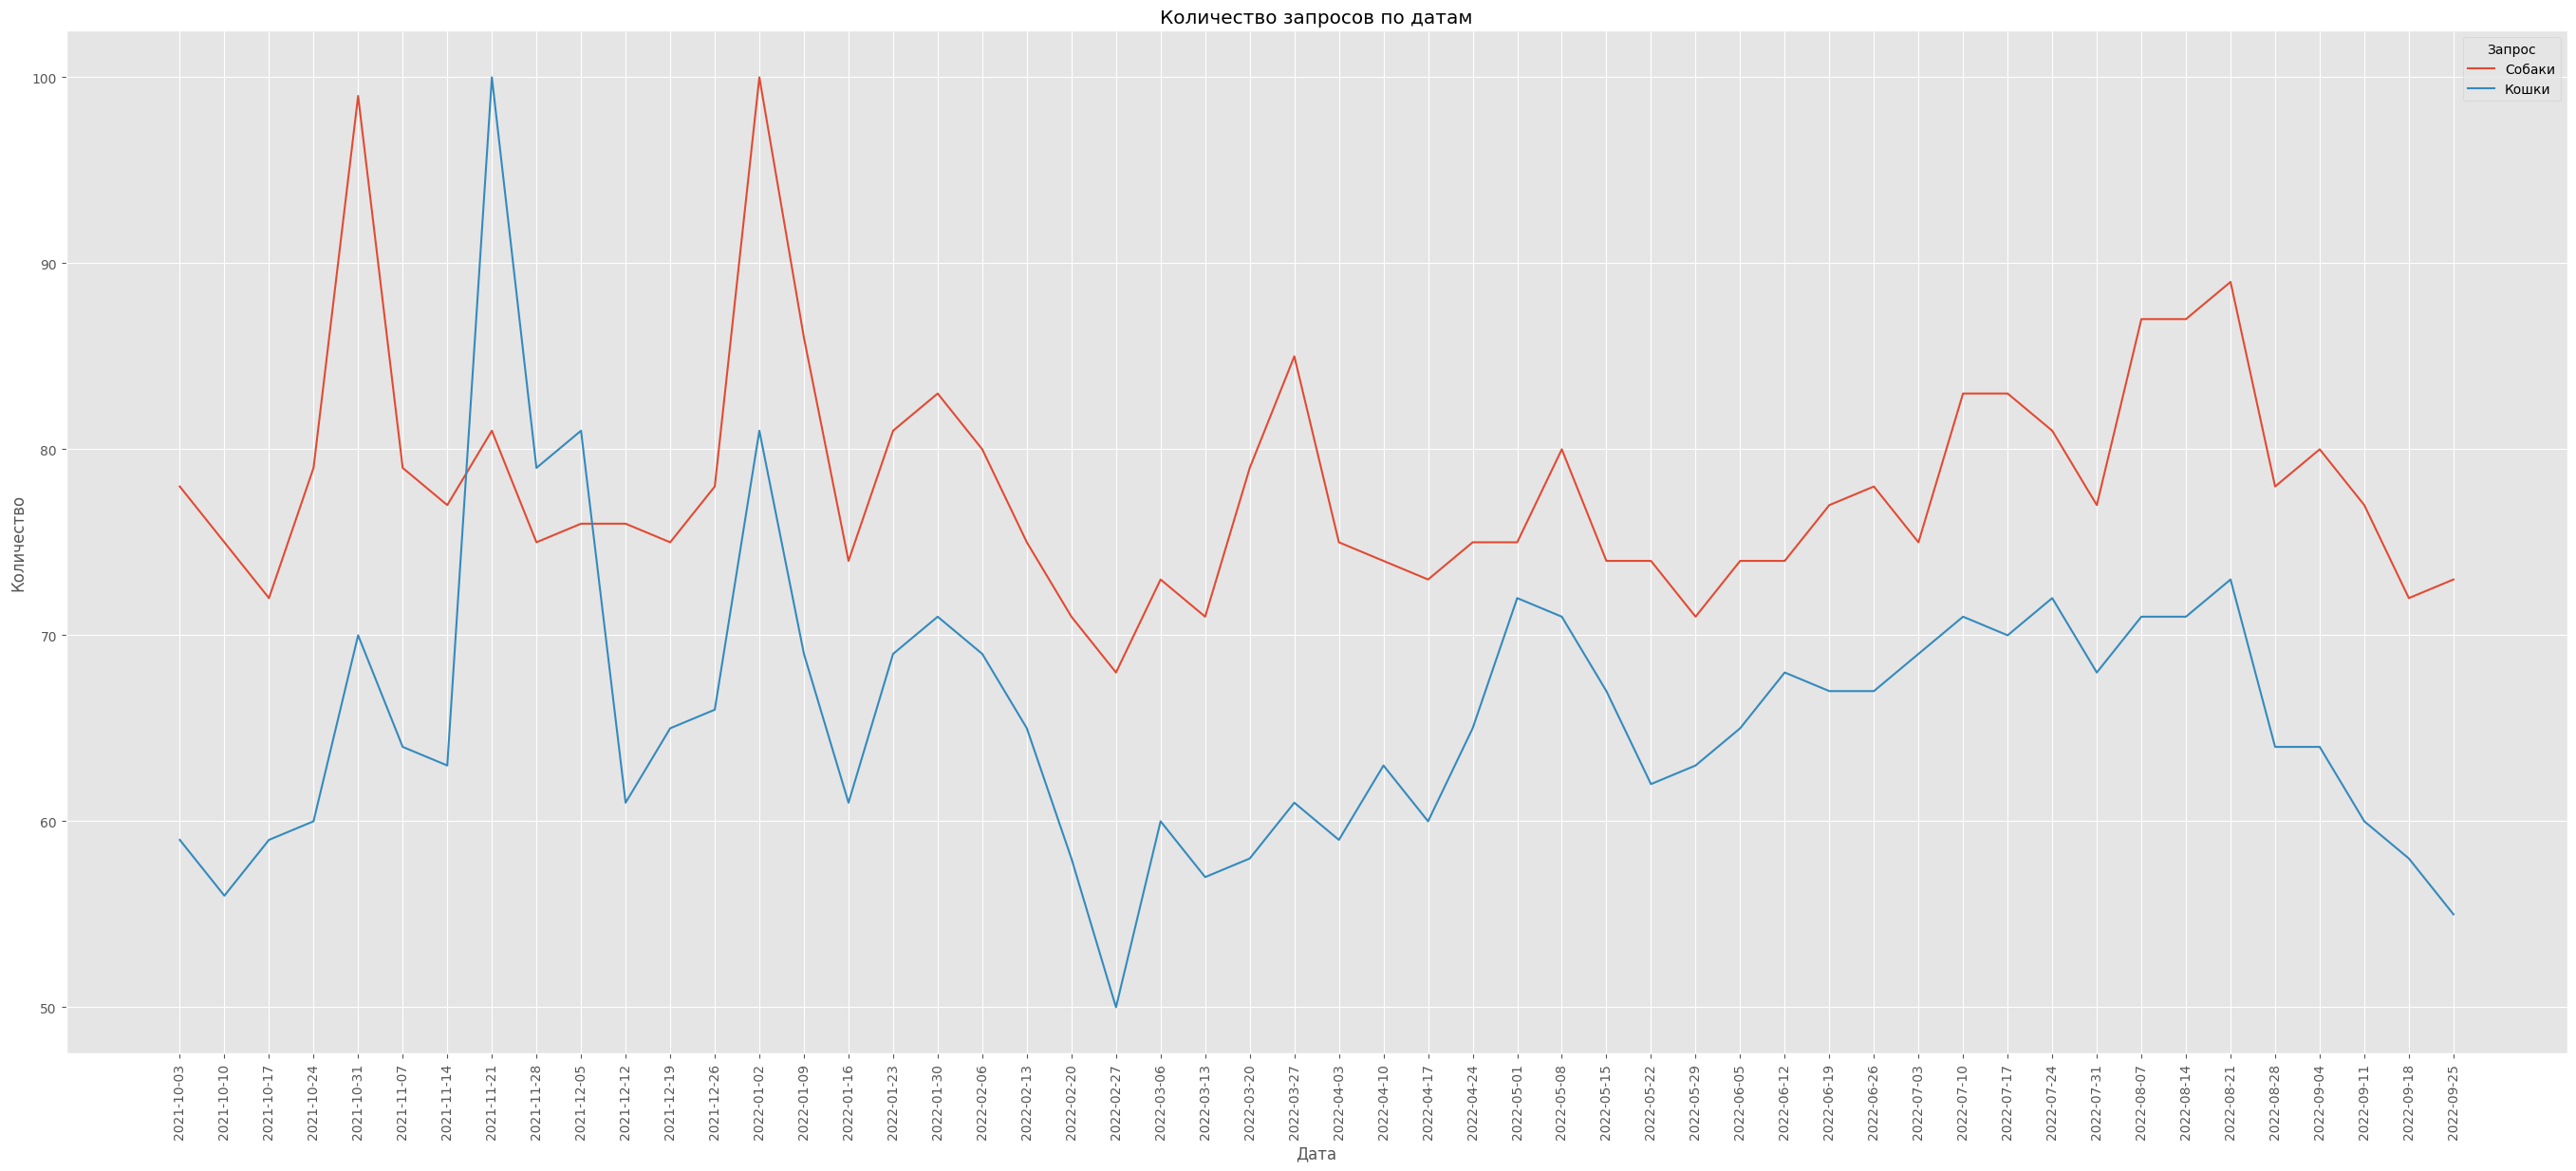

In [431]:
plt.figure(figsize=(34,14))
sns.lineplot(data=data_merge, x="Дата", y="Количество", hue="Запрос")
plt.xticks(rotation=90)
plt.title("Количество запросов по датам")
plt.savefig('charts/white_version/dogs_and_cats.png')
plt.show()

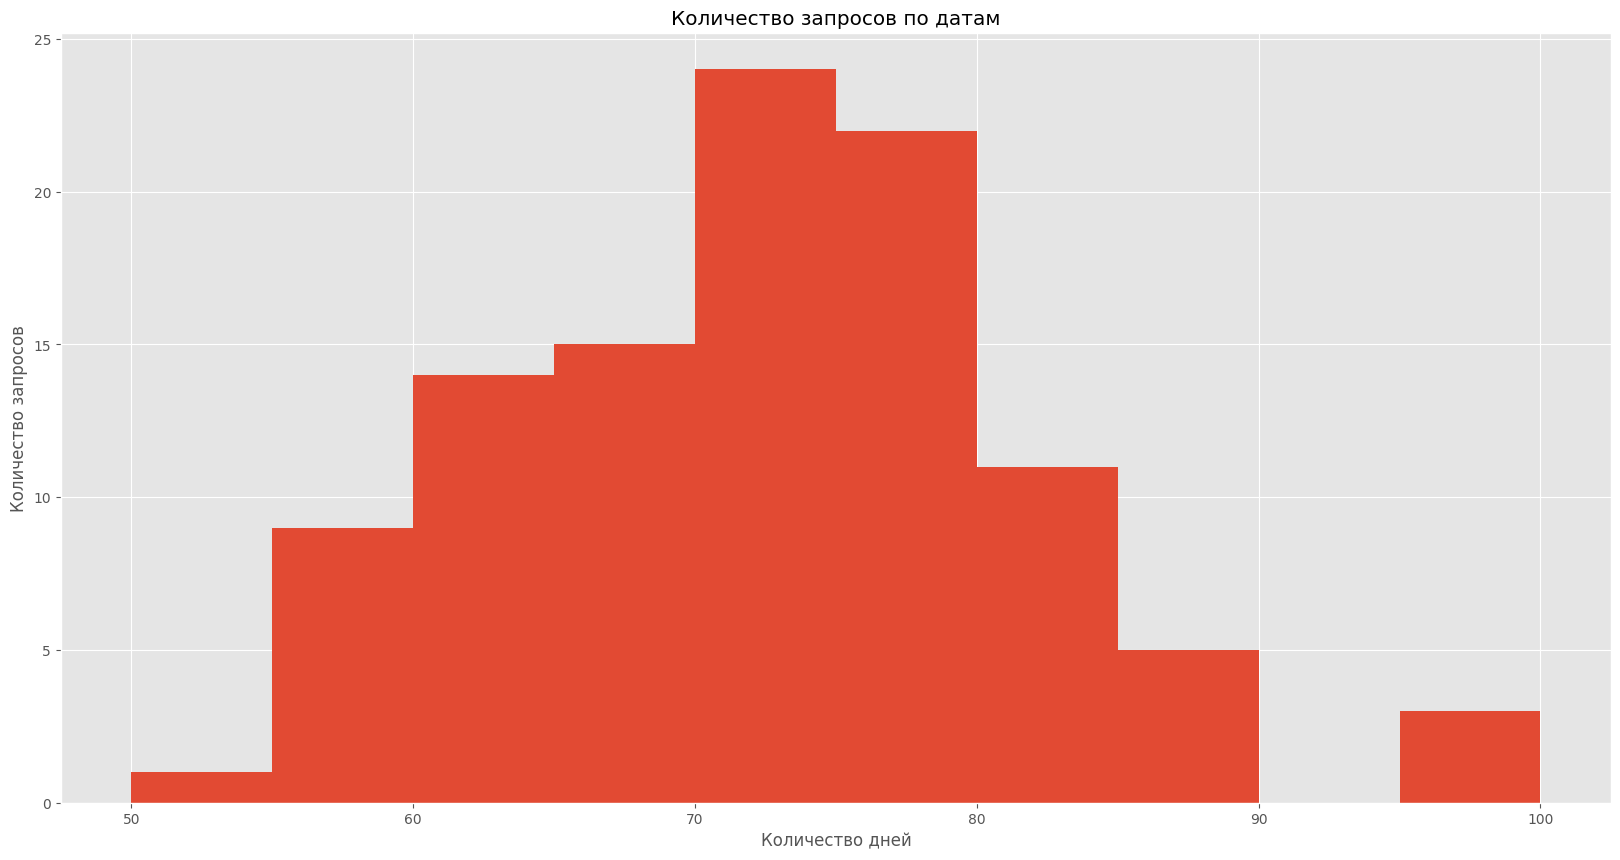

In [433]:
data_merge.Количество.hist(figsize=(20, 10))
plt.title("Количество запросов по датам")
plt.xlabel("Количество дней")
plt.ylabel("Количество запросов")
plt.savefig("charts/white_version/requests.png")

In [434]:
vk_dogs_data = pd.DataFrame(
    [
        ["Собаки", 685_437], ["Подслушано Собаки", 101_785], ["Собаки ЧИХУАХУА", 40_481],
        ["Собаки (1)", 303_998], ["Собаки (2)", 24_413], ["Барахолка|собаки", 13_434],
        ["Собаки (3)", 31], ["Just Dogs: собаки", 128_168]],
    columns=["name", "count"]
)

In [435]:
vk_dogs_data

,name,count
0,Собаки,685437
1,Подслушано Собаки,101785
2,Собаки ЧИХУАХУА,40481
3,Собаки (1),303998
4,Собаки (2),24413
5,Барахолка|собаки,13434
6,Собаки (3),31
7,Just Dogs: собаки,128168


In [436]:
plt.style.use("mpl20")

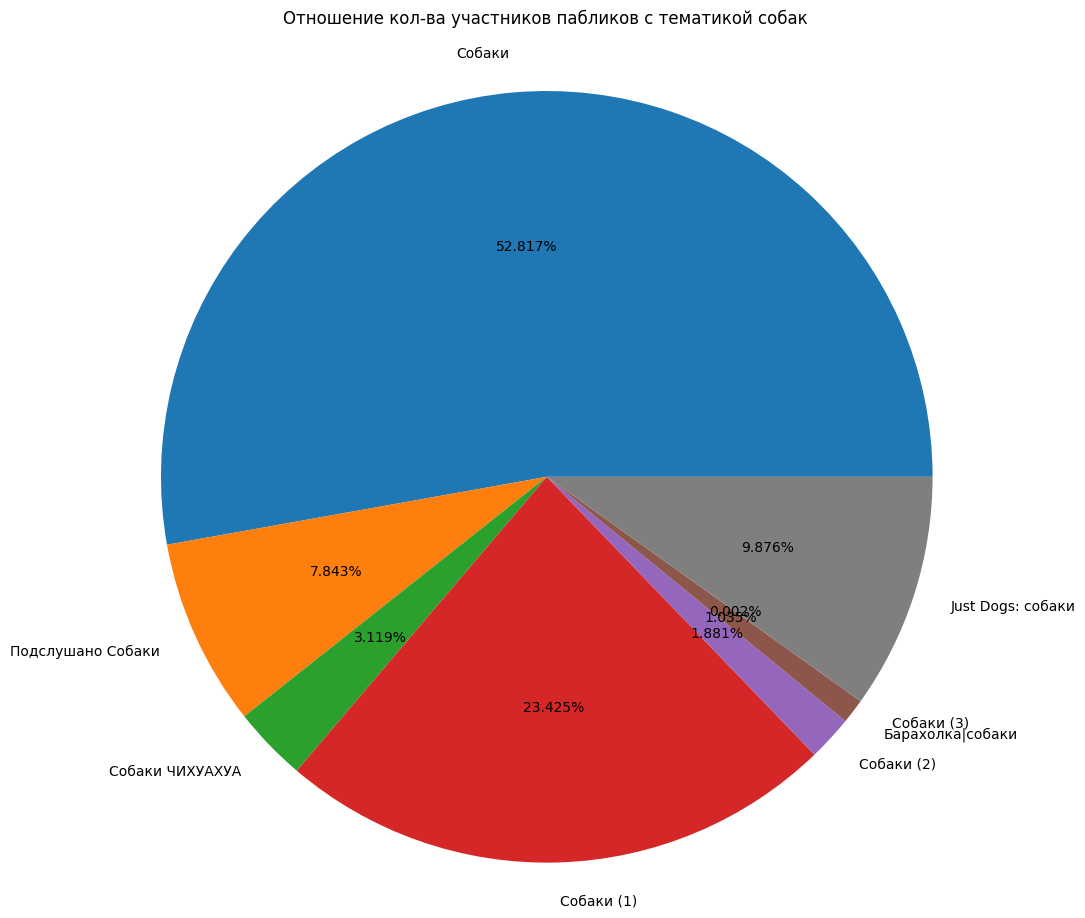

In [437]:
fig, ax = plt.subplots()
ax.pie(vk_dogs_data["count"].values, autopct='%.3f%%', labels=vk_dogs_data["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва участников пабликов с тематикой собак\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_dogs.png")

In [438]:
vk_cats_data = pd.DataFrame(
    [
        ["КОШКИ", 284_165], ["Кошки (1)", 153_901], ["Кошки Фото", 86_640],
        ["Кошки (2)", 226_756], ["СФИНКСЫ-ВОЛШЕБНЫЕ КОШКИ", 54_082], ["Кошки&Коты&Котята", 104_966],
        ["Кошки Петербурга", 838], ["BobCat TB/Дикие кошки", 36_949]],
    columns=["name", "count"]
)

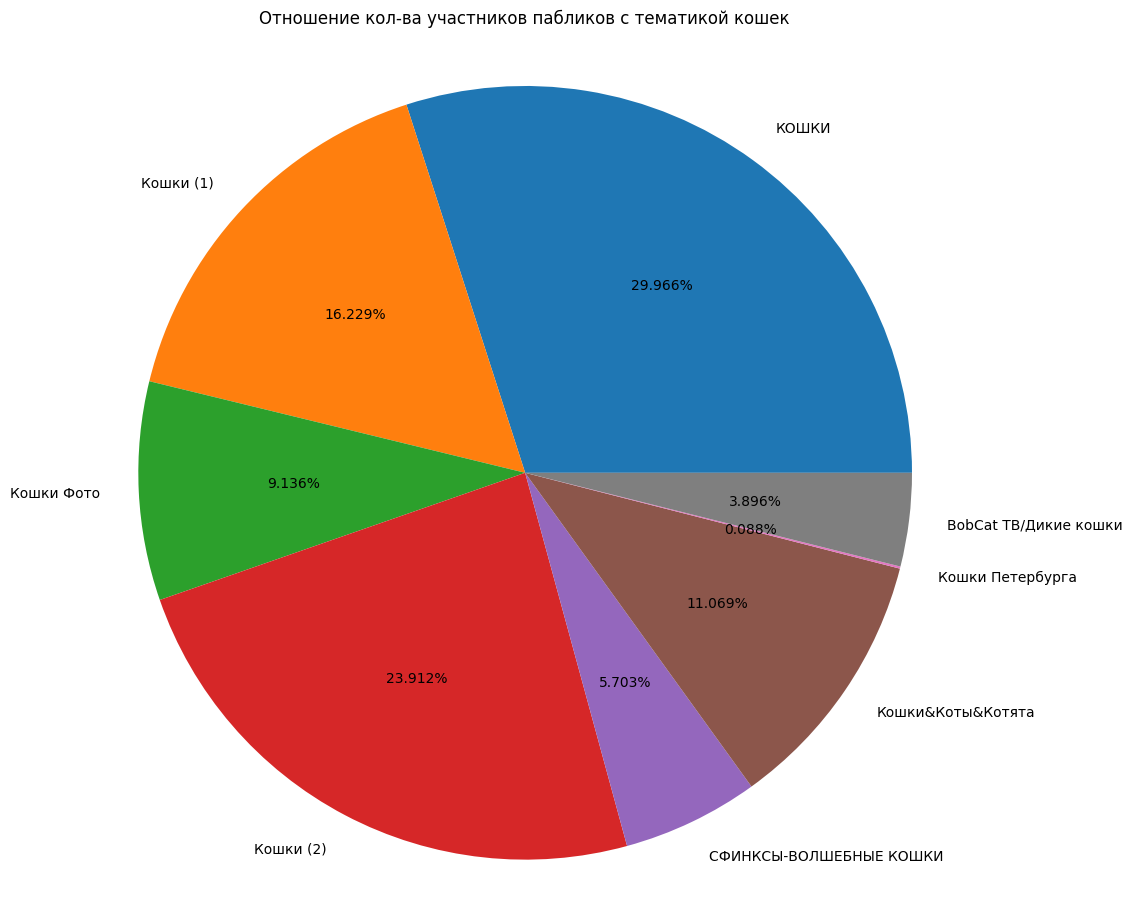

In [439]:
fig, ax = plt.subplots()
ax.pie(vk_cats_data["count"].values, autopct='%.3f%%', labels=vk_cats_data["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва участников пабликов с тематикой кошек\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_cats.png")

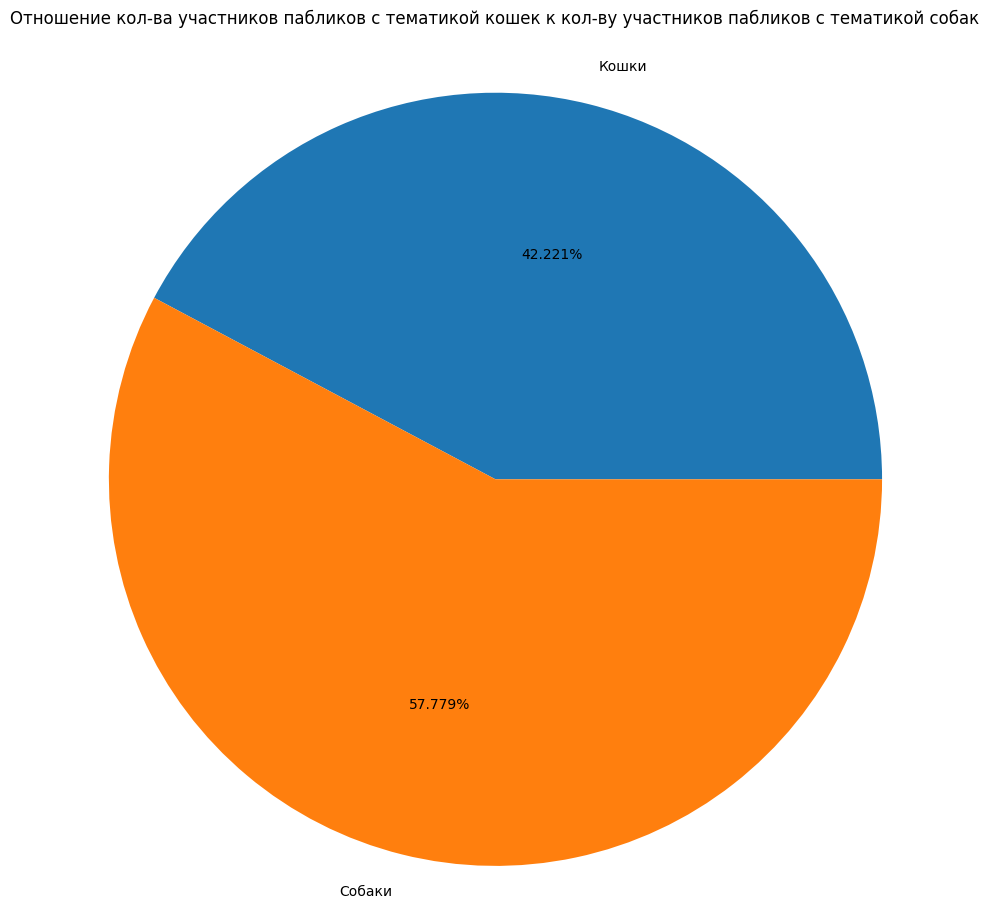

In [440]:
fig, ax = plt.subplots()
ax.pie([vk_cats_data["count"].sum(), vk_dogs_data["count"].sum()], autopct='%.3f%%', labels=["Кошки", "Собаки"])
ax.axis("equal")
plt.title("Отношение кол-ва участников пабликов с тематикой кошек к кол-ву участников пабликов с тематикой собак\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/cats_dogs.png")

In [441]:
hashtags_cats = pd.DataFrame(
    [
        ["#коты", 3_100_000], ["#котикиправятмиром", 851_000], ["#котикитакиекотики", 514_000],
        ["#кот", 12_600_000], ["#котики", 6_500_000], ["#котята", 3_000_000]],
    columns=["name", "count"]
)

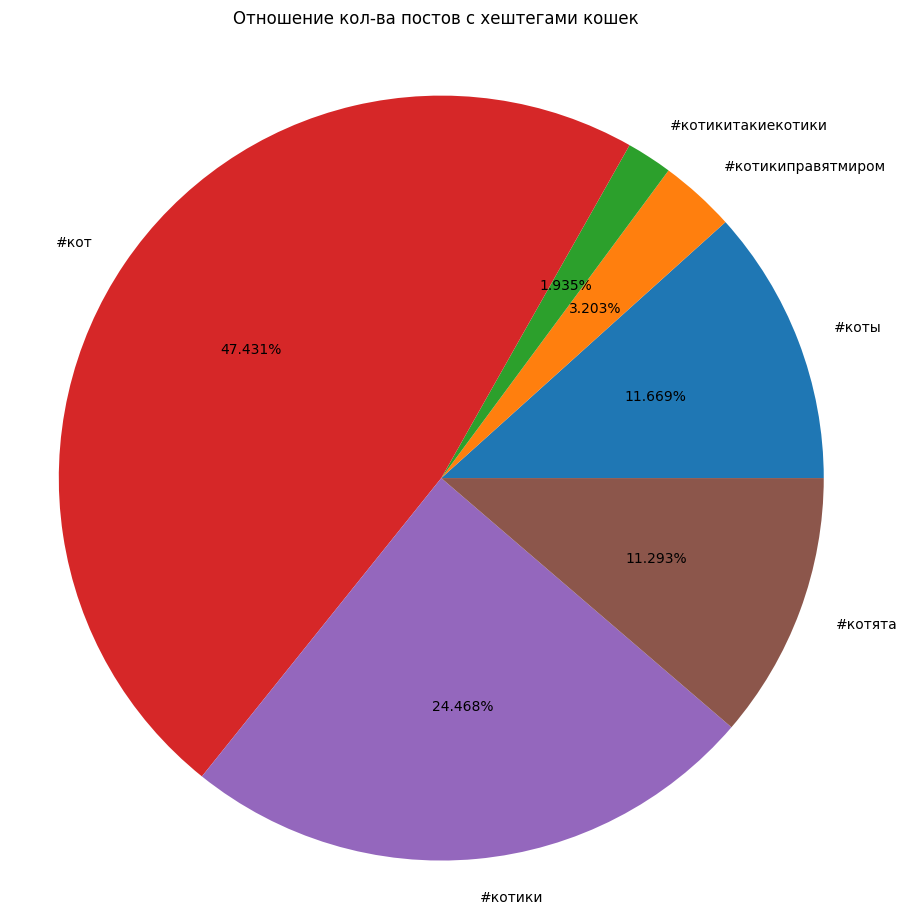

In [442]:
fig, ax = plt.subplots()
ax.pie(hashtags_cats["count"].values, autopct='%.3f%%', labels=hashtags_cats["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва постов с хештегами кошек\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_cats_hashtags.png")

In [443]:
hashtags_dogs = pd.DataFrame(
    [
        ["#собаки", 4_100_000], ["#собакитакиесобаки", 82_500], ["#собачки", 511_000],
        ["#пес", 1_100_000], ["#песик", 324_000], ["#щенкинапродажу", 407_000]],
    columns=["name", "count"]
)

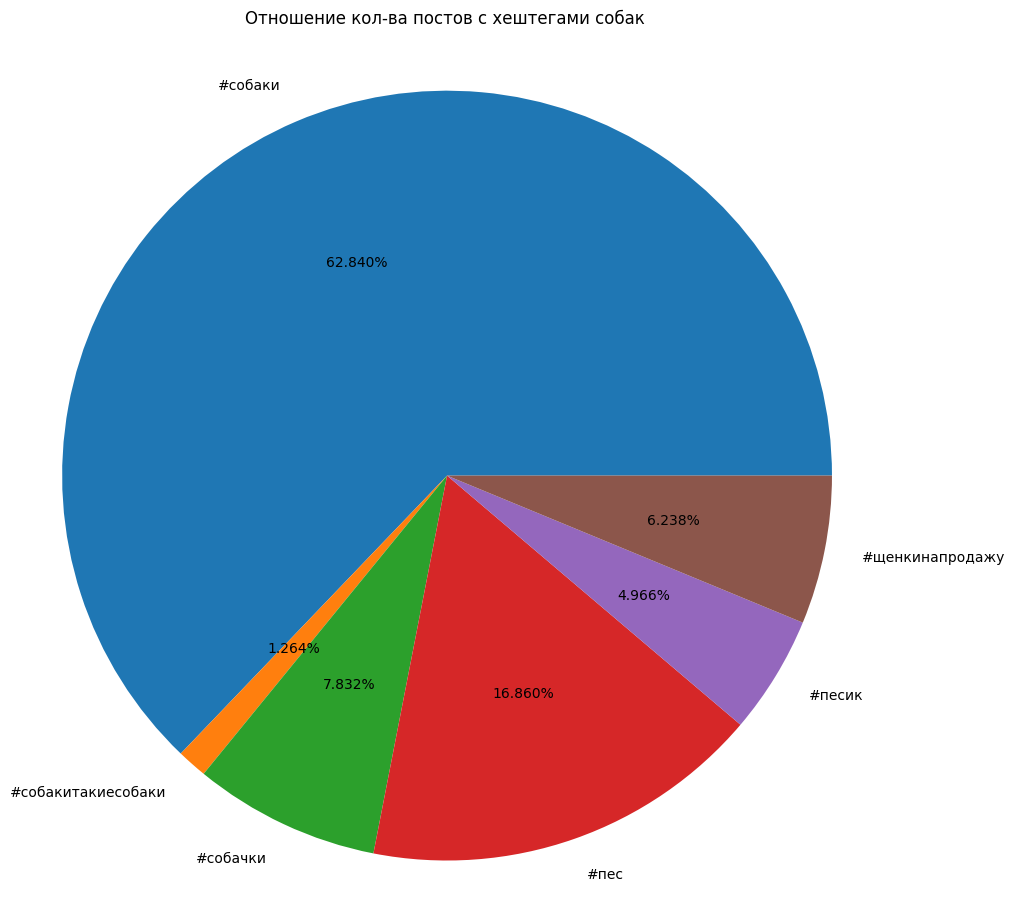

In [444]:
fig, ax = plt.subplots()
ax.pie(hashtags_dogs["count"].values, autopct='%.3f%%', labels=hashtags_dogs["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва постов с хештегами собак\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_dogs_hashtags.png")

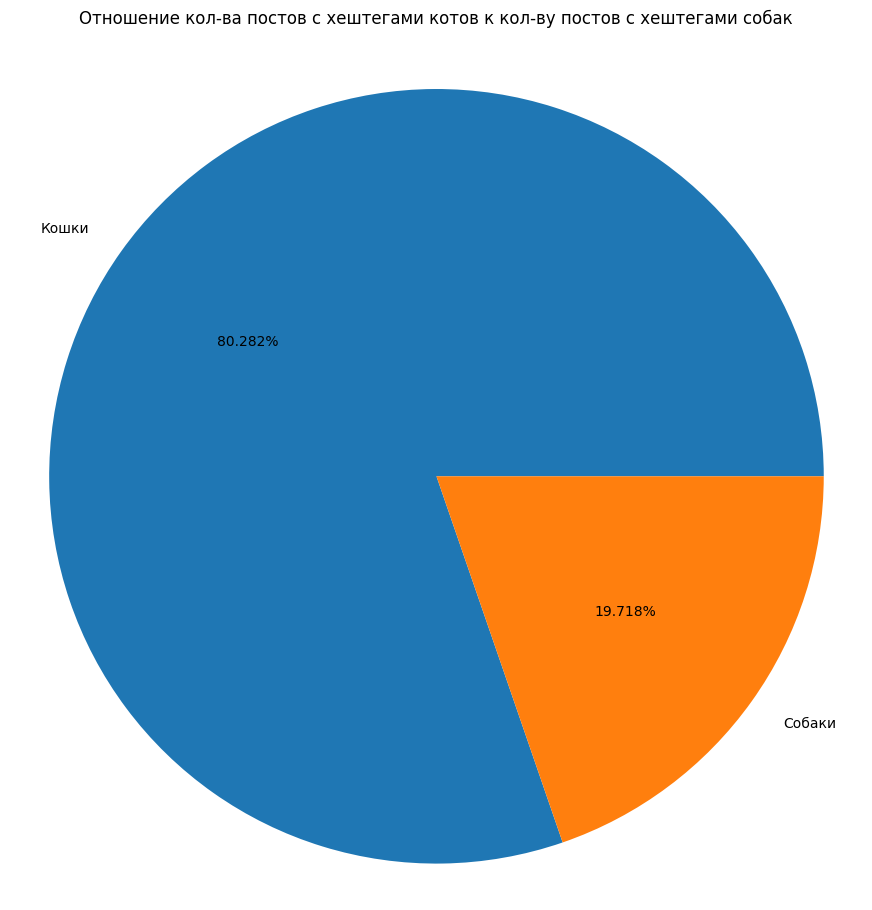

In [445]:
fig, ax = plt.subplots()
ax.pie([hashtags_cats["count"].sum(), hashtags_dogs["count"].sum()], autopct='%.3f%%', labels=["Кошки", "Собаки"])
ax.axis("equal")
plt.title("Отношение кол-ва постов с хештегами котов к кол-ву постов с хештегами собак\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_cats_hashtags_and_dogs_hashtags.png")

In [446]:
dog_forums = pd.DataFrame(
    [
        ["Sobakino", 3068], ["Dogpage",1324], ["Dogsforum", 56]],
    columns=["name", "count"]
)

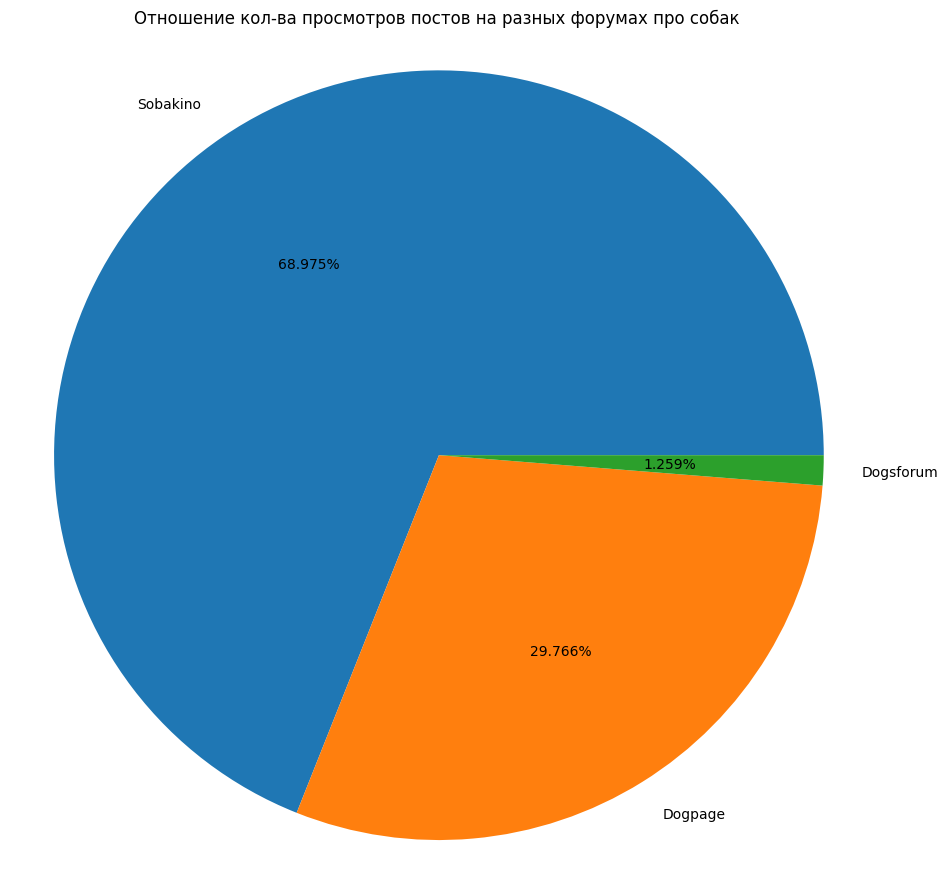

In [447]:
fig, ax = plt.subplots()
ax.pie(dog_forums["count"].values, autopct='%.3f%%', labels=dog_forums["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва просмотров постов на разных форумах про собак")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_dogs_forums.png")

In [448]:
cat_forums = pd.DataFrame(
    [
        ["CAT-форум", 1_040_346], ["Кошки мира ", 1_32_404], ["Созвездие Европы ", 10_066]],
    columns=["name", "count"]
)

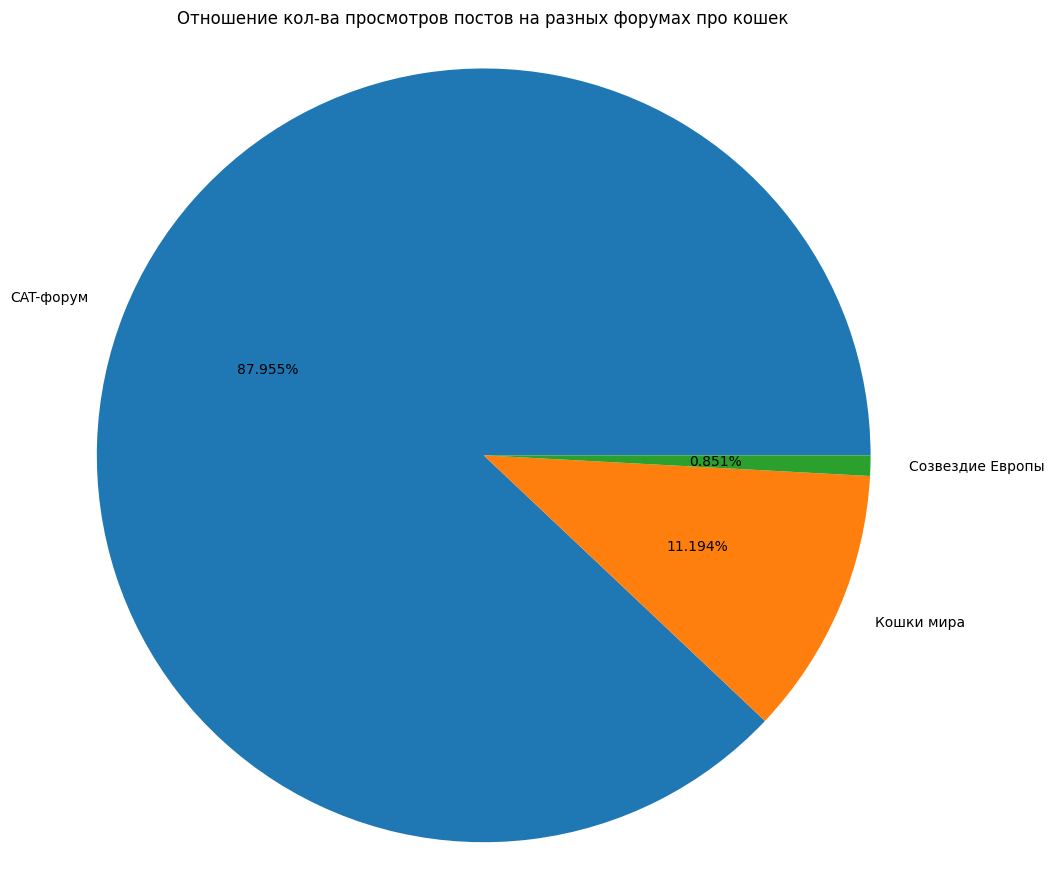

In [449]:
fig, ax = plt.subplots()
ax.pie(cat_forums["count"].values, autopct='%.3f%%', labels=cat_forums["name"].values)
ax.axis("equal")
plt.title("Отношение кол-ва просмотров постов на разных форумах про кошек")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_cats_forums.png")

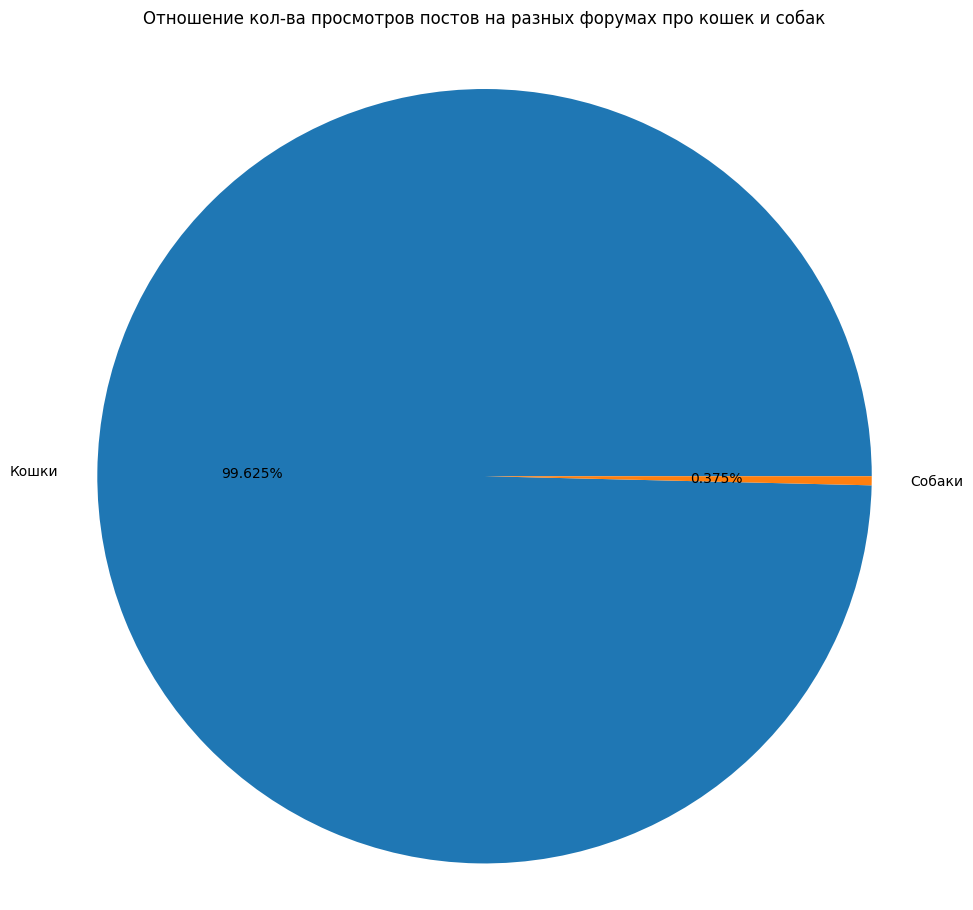

In [450]:
fig, ax = plt.subplots()
ax.pie([cat_forums["count"].sum(), dog_forums["count"].sum()], autopct='%.3f%%', labels=["Кошки", "Собаки"])
ax.axis("equal")
plt.title("Отношение кол-ва просмотров постов на разных форумах про кошек и собак\n")
fig.set_size_inches(11, 11)
plt.savefig("charts/white_version/pie_cats_hashtags_and_dogs_hashtags.png")

In [456]:
all_data = pd.DataFrame(
    [
        ["Собаки в ВК", vk_dogs_data["count"].sum()],
        ["Коты в ВК", vk_cats_data["count"].sum()],
        ["Хэштеги котов", hashtags_cats["count"].sum()],
        ["Хэштеги собак", hashtags_dogs["count"].sum()],
        ["Форумы собак", dog_forums["count"].sum()],
        ["Форумы котов", cat_forums["count"].sum()]
    ], columns=["type", "value"])

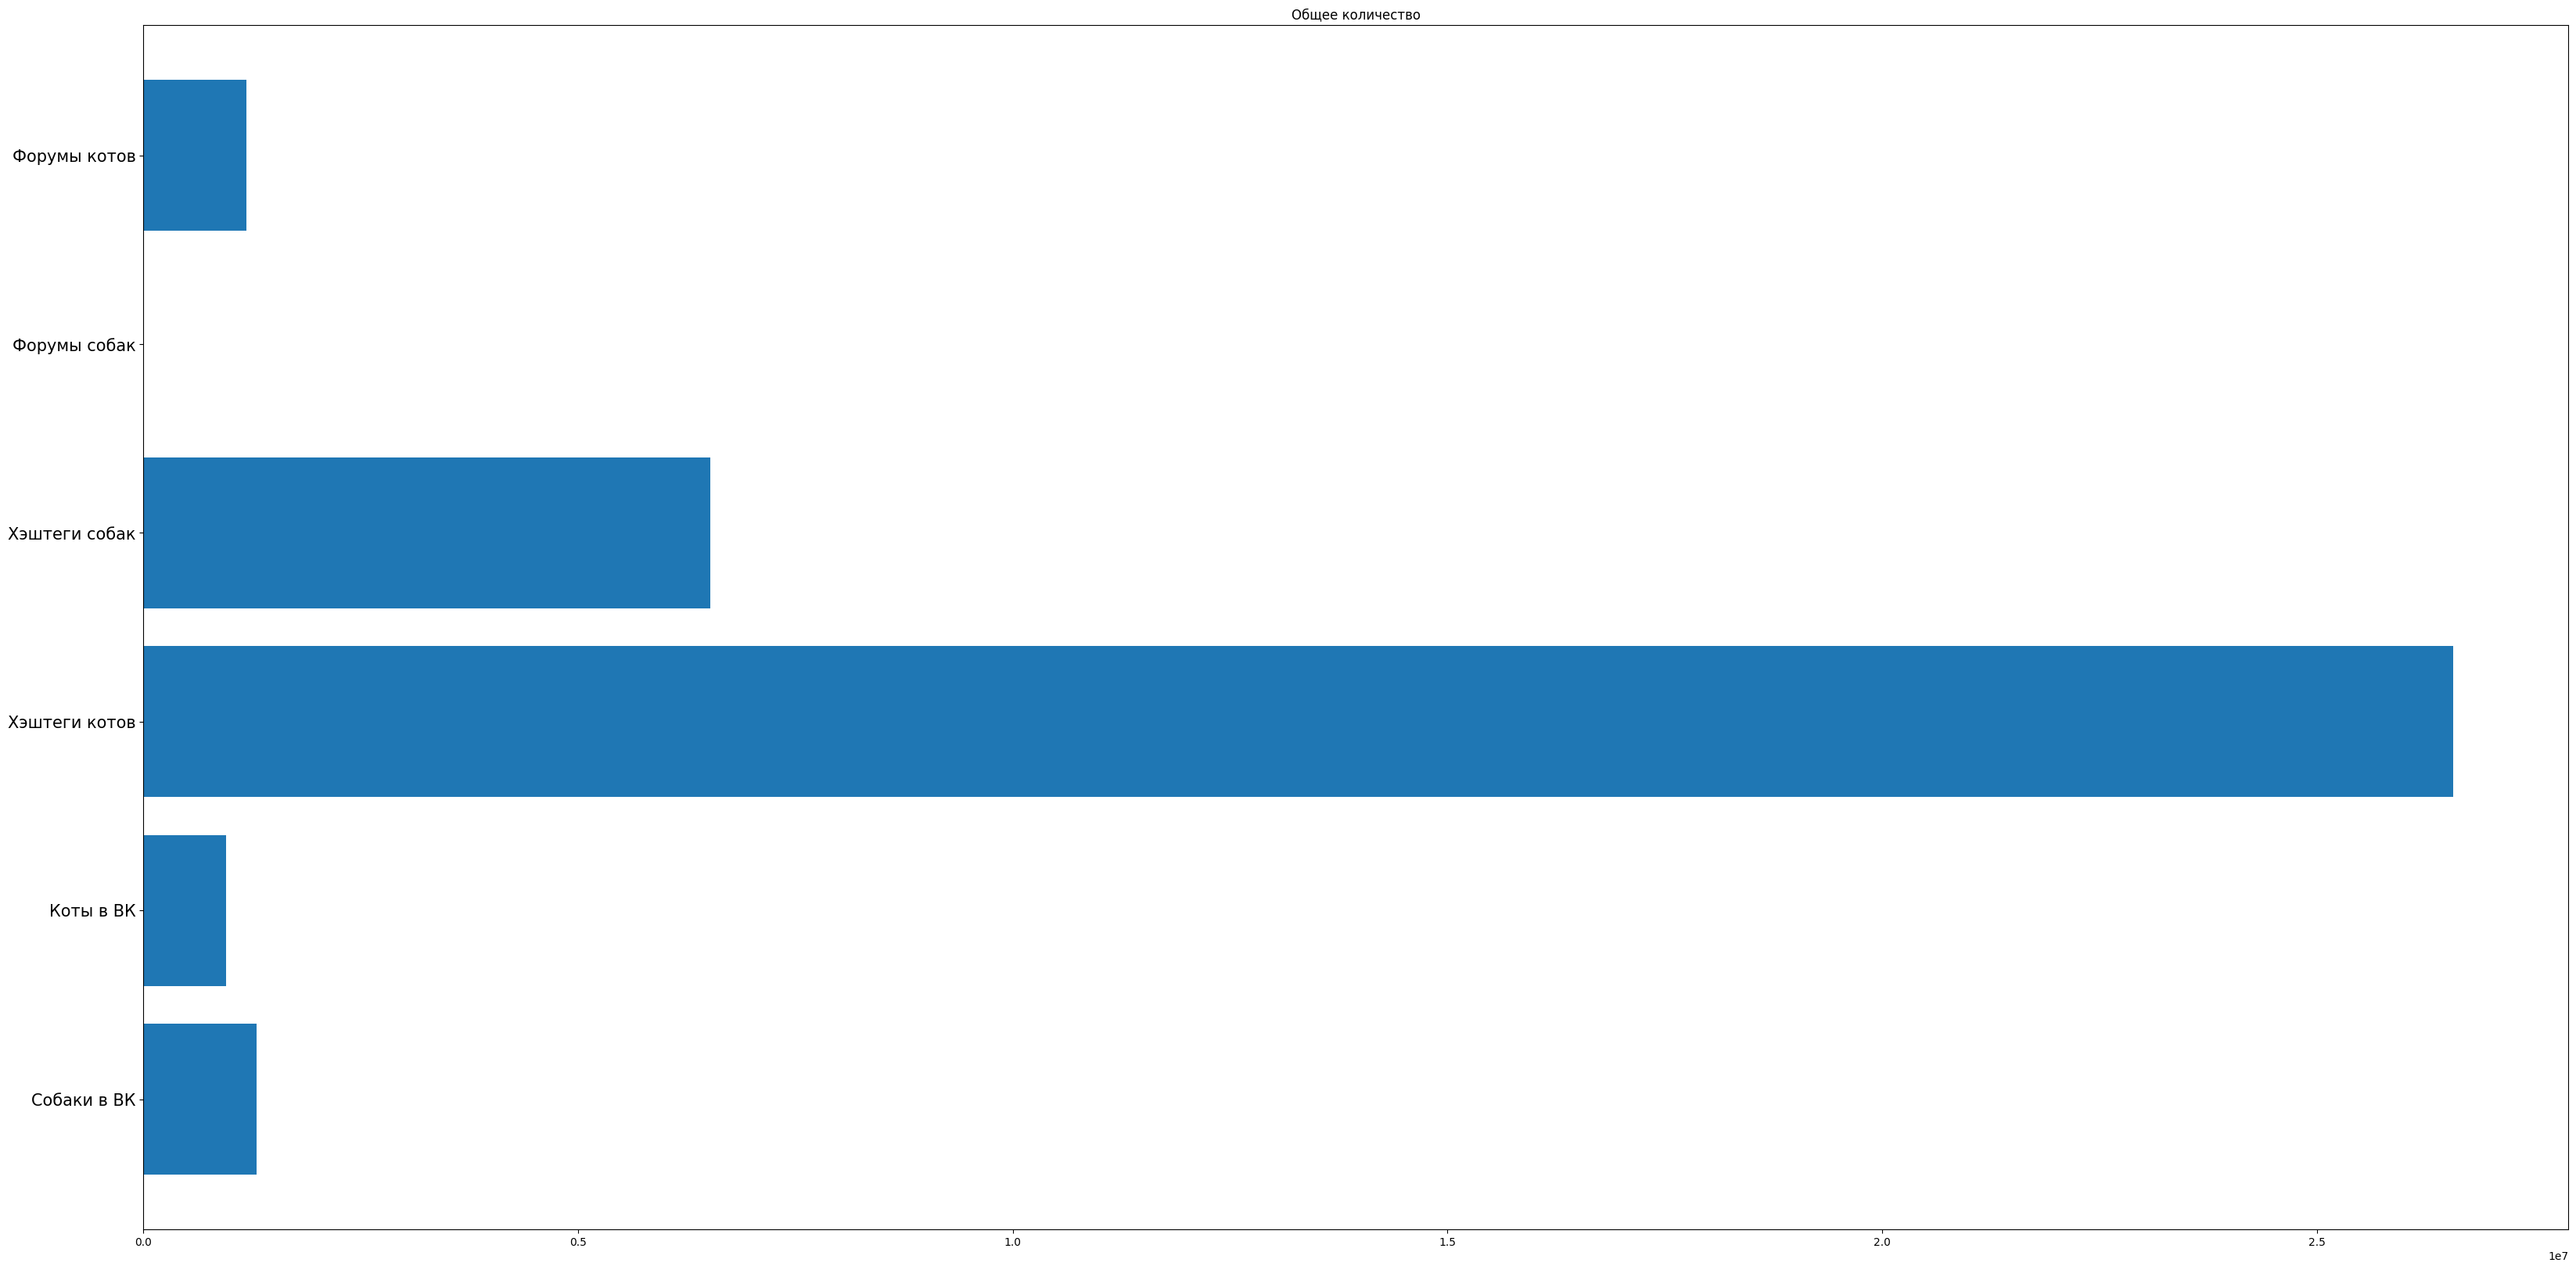

In [458]:
fig, ax = plt.subplots()
ax.barh(all_data.type, all_data.value)
ax.set_yticks(all_data.type)
ax.set_yticklabels(all_data.type, fontsize=15)
ax.set_title("Общее количество")
fig.set_figwidth(40)
fig.set_figheight(20)
plt.savefig('charts/white_version/all.png')